In [10]:
from data_generator.object_detection_2d_data_generator import DataGenerator

In [3]:
train_dataset = DataGenerator()

images_dir = ''
train_labels_filename = 'train_anno_sample.csv'
train_dataset.parse_csv(images_dir=images_dir,
                        labels_filename=train_labels_filename,
                        input_format=['image_name', 'xmin', 'ymin', 'xmax', 'ymax', 'class_id'], # This is the order of the first six columns in the CSV file that contains the labels for your dataset. If your labels are in XML format, maybe the XML parser will be helpful, check the documentation.
                        include_classes='all')

In [4]:
train_dataset.create_hdf5_dataset(file_path='wider_train_sample.h5',
                                  resize=False,
                                  variable_image_size=True,
                                  verbose=True)

Creating HDF5 dataset: 100%|██████████| 160/160 [00:04<00:00, 32.29it/s]


In [11]:
val_labels_filename = 'val_anno_updated_v2.csv'
val_dataset = DataGenerator()
val_dataset.parse_csv(images_dir=images_dir,
                      labels_filename=val_labels_filename,
                      input_format=['image_name', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'],
                      include_classes='all')

In [12]:
val_dataset.create_hdf5_dataset(file_path='wider_val_new_v2.h5',
                                resize=False,
                                variable_image_size=True,
                                verbose=True)


Creating HDF5 dataset: 100%|██████████| 1485/1485 [00:46<00:00, 31.98it/s]


In [3]:
import h5py

dataset = h5py.File('wider_train.h5', 'r')


<HDF5 file "wider_train.h5" (mode r)>

In [9]:
dataset['image_ids'][1]

'/home/intern2020/Taeseong/BlazeFace/data/WIDER_train/images/0--Parade/0_Parade_Parade_0_1019'

In [9]:
import pandas as pd
df = pd.read_csv('val_anno_updated.csv')
df_sample = df[:1485]
df_sample.to_csv('val_anno_updated_v2.csv', index=False)

In [25]:
import pandas as pd
import cv2
df = pd.read_csv('train_anno_updated.csv')
for i in range(len(df)):
    df.img_path[i] = '/workspace'+df.img_path[i][25:]

#     df.loc[img]['xmin'] = df[img]['xmin'] /128 * x
#     df[img]['ymin'] = df[img]['ymin'] /128 * y
#     df[img]['xmax'] = df[img]['xmax'] /128 * x
#     df[img]['ymax'] = df[img]['ymax'] /128 * y


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [26]:
df

,img_path,xmin,ymin,xmax,ymax,class_id
0,/workspace/BlazeFace/data/WIDER_train/images/1...,445.316833,51.590427,844.629089,251.245697,1
1,/workspace/BlazeFace/data/WIDER_train/images/1...,409.363464,161.421621,682.986328,447.072224,1
2,/workspace/BlazeFace/data/WIDER_train/images/1...,206.208801,233.963901,553.418640,454.356548,1
3,/workspace/BlazeFace/data/WIDER_train/images/1...,250.450027,195.141441,388.688965,287.346557,1
4,/workspace/BlazeFace/data/WIDER_train/images/1...,516.334656,338.236682,646.147156,501.135314,1
...,...,...,...,...,...,...
6124,/workspace/BlazeFace/data/WIDER_train/images/1...,454.385712,241.612779,632.469849,360.915095,1
6125,/workspace/BlazeFace/data/WIDER_train/images/1...,269.990540,152.928736,409.992615,246.172875,1
6126,/workspace/BlazeFace/data/WIDER_train/images/1...,381.846527,417.502496,550.596313,541.756249,1
6127,/workspace/BlazeFace/data/WIDER_train/images/1...,533.885620,223.381466,680.013428,394.628263,1


In [27]:
df.to_csv('train_anno_docker.csv',index=False)

In [2]:
import pandas as pd

log= pd.read_csv('blazeface_training_log.csv')
log

,epoch,loss,val_loss
0,0,12.281598,14.636184
1,1,10.206281,14.270561
2,2,9.516543,9.552668
3,3,9.143902,12.302248
4,4,8.930488,10.451619
...,...,...,...
117,117,5.949276,7.705238
118,118,5.942545,6.375311
119,119,5.941539,2.180707
120,120,5.929264,9.571589


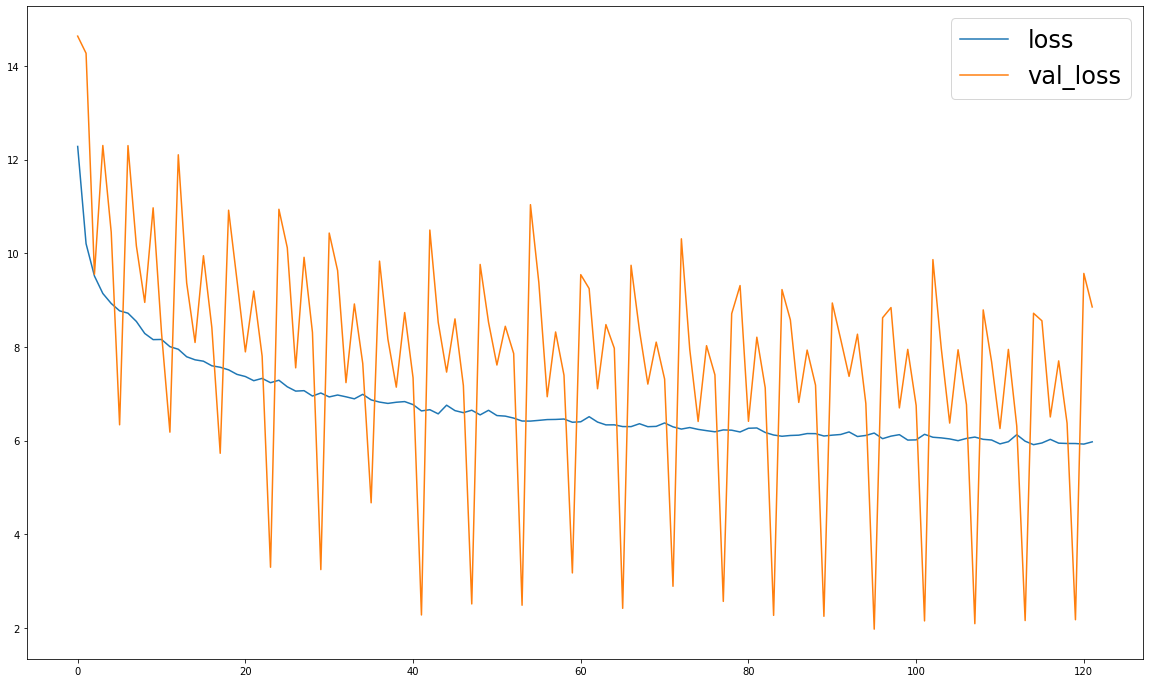

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,12))
plt.plot(log['loss'], label='loss')
plt.plot(log['val_loss'], label='val_loss')
plt.legend(loc='upper right', prop={'size': 24});